https://www.mortality.org/

In [296]:
from pathlib import Path
import pandas as pd
import numpy as np
# data fetching
import pandas_datareader.data as web # FRED downloads
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib.lines import Line2D
# transforms are used for text positioning
from matplotlib import transforms
# show all 

# customize font in visualizations
mpl.rcParams['font.family'] = 'monospace'
# mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#fafaf9'

https://commons.wikimedia.org/wiki/File:Japan_animated_population_pyramid.gif

We can fill in historical population by age group using this data:
https://warp.da.ndl.go.jp/info:ndljp/pid/1334623/www.stat.go.jp/data/chouki/zuhyou/02-03.xls

found on this page:
https://warp.da.ndl.go.jp/info:ndljp/pid/1334623/www.stat.go.jp/english/data/chouki/02.htm

referenced by this R package:
https://rdrr.io/cran/fmsb/man/Jpop.html

Can download source code here:
https://cran.r-project.org/web/packages/fmsb/index.html


```R
Jpop <- data.frame(
 Age = c(sprintf("%d",0:84),"85+"),
 M1888 = c(539962, 469536, 470197, 449086, 443053, 458304, 450499, 454853, 440727, 444884, 441802, 429857, 445958, 412208, 402551, 400626, 354671, 328631, 318501, 320255, 367315, 332457, 326722, 353824, 337183, 286454, 267747, 248681, 284076, 282911, 307536, 304933, 295960, 292081, 300346, 293079, 298184, 254272, 269215, 288596, 274011, 260447, 242722, 251201, 236685, 241090, 209308, 215382, 202426, 186624, 171901, 142281, 169829, 169811, 157469, 156079, 169846, 152641, 166130, 140839, 141986, 136525, 122316, 124440, 115478, 104853, 106483, 86080, 84246, 82064, 69670, 59619, 57921, 49142, 44238, 41984, 34636, 32570, 25655, 20675, 19302, 15535, 12449, 10829, 8341, 15116),
 F1888 = c(520477, 456728, 464484, 437816, 436275, 452806, 440192, 449820, 431196, 436490, 430249, 416833, 436860, 402193, 393830, 390332, 343913, 318685, 309364, 312341, 353366, 324587, 314969, 341210, 325249, 279142, 260291, 243576, 272548, 277030, 291097, 293245, 283190, 278231, 282355, 276216, 277217, 241261, 250557, 271006, 252869, 248619, 202031, 242039, 220613, 223010, 195498, 199379, 190087, 174937, 162685, 139618, 163277, 165918, 153014, 157093, 168845, 152207, 161576, 143623, 147307, 140389, 127731, 131105, 123072, 113425, 113211, 97254, 95246, 92907, 79595, 72185, 70452, 61542, 55903, 54271, 46616, 44037, 35214, 30470, 28239, 23855, 19564, 17354, 13497, 28919),
 M1893 = c(531884, 513295, 450066, 469437, 493529, 479868, 439925, 450351, 435507, 435302, 452498, 445389, 450400, 437540, 441487, 436830, 422396, 439676, 405094, 393641, 389073, 343620, 317886, 304964, 306768, 352743, 318411, 313469, 340083, 323864, 274532, 256060, 237639, 271387, 269131, 293987, 292457, 281992, 278821, 285916, 276905, 281637, 239655, 252098, 271199, 256147, 242090, 224229, 232286, 217095, 220575, 189748, 194073, 182214, 166659, 152201, 123033, 147627, 146318, 132928, 131473, 141716, 125394, 134802, 111637, 110911, 105788, 92241, 92559, 83626, 73350, 72816, 57037, 53939, 50629, 41589, 33400, 31345, 25499, 21596, 19251, 14999, 13250, 9810, 7262, 23411),
 F1893 = c(514991, 496325, 439461, 456309, 481878, 465354, 429037, 444884, 426928, 427514, 448257, 435490, 446481, 428566, 431449, 425001, 409843, 430262, 395188, 384955, 380341, 332723, 308511, 295267, 298801, 340030, 308992, 300281, 325505, 310628, 264545, 246640, 228807, 257809, 261284, 275144, 276314, 266833, 262420, 266216, 259082, 259851, 225665, 235273, 254253, 236742, 233660, 187499, 226921, 205771, 208324, 180272, 184421, 174648, 159099, 147771, 124527, 146364, 148255, 134189, 138032, 147163, 131302, 137866, 120419, 121922, 114831, 102381, 104250, 95173, 85353, 83798, 69642, 65784, 62702, 51926, 44155, 42105, 35233, 30165, 27863, 22531, 20097, 15134, 12254, 40897),
 M1898 = c(610181, 566578, 528074, 517467, 501655, 477716, 479135, 429067, 455998, 484852, 474595, 434128, 444642, 430407, 430185, 447303, 439833, 443536, 428980, 431504, 426227, 411754, 426814, 389848, 376914, 374171, 327661, 304114, 291981, 293383, 339995, 306348, 299073, 327382, 310989, 261791, 242355, 224144, 258210, 256376, 280548, 278364, 267512, 263866, 269469, 261455, 265605, 222129, 234035, 251991, 236531, 222624, 203763, 210858, 194960, 197579, 167547, 170646, 158749, 143012, 129182, 102204, 122084, 119564, 106861, 103793, 110537, 95486, 100971, 81161, 79268, 73315, 61718, 60466, 52855, 44452, 42542, 31575, 29128, 26056, 20238, 14656, 12992, 10074, 8060, 26662),
 F1898 = c(599251, 549702, 521339, 503210, 485609, 466586, 466875, 422199, 444950, 475109, 461107, 423598, 438998, 421034, 422676, 441201, 429114, 439147, 419572, 421525, 415300, 398323, 418838, 381668, 371662, 367081, 319343, 294618, 282975, 285071, 325182, 296682, 285809, 312337, 297486, 250877, 232302, 214233, 243422, 247516, 260100, 261115, 252430, 246514, 250306, 245481, 245790, 211723, 219948, 240104, 221636, 219637, 171766, 211085, 189132, 191570, 163566, 166784, 157738, 142062, 130436, 108304, 127503, 127296, 114062, 115837, 121890, 106750, 110123, 93834, 94037, 86287, 74977, 74754, 65780, 57034, 53703, 42789, 38872, 36021, 28063, 22138, 19810, 15788, 12763, 47445),
 M1903 = c(664315, 638514, 616396, 572519, 549855, 550031, 531195, 506818, 504418, 492810, 471597, 474410, 425324, 450108, 480285, 468622, 426026, 434786, 419418, 417953, 435392, 429125, 431056, 415809, 417046, 412211, 397700, 413026, 377825, 364985, 362590, 317693, 294485, 282647, 283627, 327134, 294012, 287552, 314248, 297143, 250808, 232242, 213672, 245604, 244039, 265958, 262832, 251498, 247694, 251072, 242082, 245527, 204086, 213565, 228408, 212567, 199353, 180915, 185673, 169604, 170541, 142833, 143345, 132467, 117433, 104241, 81006, 94826, 91043, 79619, 75823, 78399, 65846, 67362, 51928, 49349, 43808, 35387, 33276, 28109, 22242, 20457, 14442, 13011, 11093, 33850),
 F1903 = c(641621, 620169, 598610, 554751, 530308, 542691, 517561, 500445, 490512, 477739, 460600, 461780, 417257, 437744, 467626, 452501, 413826, 428143, 410684, 410904, 430581, 416397, 424390, 404430, 406125, 400326, 382963, 401335, 365926, 355907, 351889, 305561, 282075, 271009, 273007, 310584, 281498, 272063, 296924, 281927, 237663, 220461, 202600, 230543, 234701, 246534, 247121, 238250, 233530, 236057, 230296, 229738, 197427, 204384, 222366, 204478, 201206, 157111, 192085, 170697, 170789, 144266, 146194, 136647, 122794, 110978, 90288, 105002, 102912, 90361, 90416, 93022, 79508, 79283, 64892, 63226, 56301, 46625, 45089, 37629, 30911, 27788, 21179, 18233, 16173, 52144),
 M1908 = c(742391, 673382, 587905, 583248, 578223, 591956, 598996, 592778, 558654, 539602, 544954, 525538, 500815, 498141, 487321, 465002, 466238, 416217, 438568, 465970, 454330, 412210, 419455, 402978, 400512, 404516, 401608, 408120, 394006, 395430, 391800, 378613, 393634, 361857, 349383, 346608, 303931, 281517, 270734, 271096, 312018, 280457, 274232, 296665, 281710, 237380, 218815, 201269, 229670, 227367, 247482, 242859, 231203, 226987, 228191, 218960, 219618, 181647, 188315, 199504, 184244, 169803, 152651, 155034, 139931, 137510, 112975, 111611, 100957, 87608, 75963, 57779, 65018, 60626, 51855, 47814, 47358, 38543, 37601, 27602, 25123, 21030, 16771, 14956, 12190, 49540),
 F1908 = c(720300, 666180, 550532, 578260, 561647, 574544, 581553, 575561, 540613, 519425, 539245, 511929, 493264, 482125, 469579, 450164, 449176, 405882, 423953, 451233, 437288, 400732, 413653, 395379, 395092, 411871, 397509, 403584, 384963, 386657, 380999, 364322, 381713, 347760, 338046, 333097, 290358, 267536, 257473, 258400, 292993, 266995, 257832, 279256, 265880, 224722, 208515, 191570, 216851, 219811, 231834, 231682, 222359, 217086, 218561, 212255, 210658, 180395, 185126, 199520, 182565, 178010, 138642, 166852, 146539, 144206, 120192, 120371, 110608, 97681, 86090, 68386, 77152, 74053, 63029, 61101, 60464, 49657, 47457, 36703, 33930, 28769, 22581, 20837, 16384, 63740),
 M1913 = c(793494, 735634, 717503, 682483, 670039, 658098, 633390, 566780, 570109, 569974, 586399, 594110, 586211, 550558, 532460, 537297, 516743, 491169, 486451, 473514, 449780, 449660, 401304, 422445, 449450, 439346, 397652, 405621, 389542, 385501, 390809, 387813, 393500, 379434, 380017, 376196, 363728, 378330, 348153, 335007, 332367, 290604, 268962, 257606, 258019, 295755, 264607, 258705, 278554, 264017, 221157, 203110, 185763, 211839, 207744, 224348, 218949, 206807, 201615, 200652, 189930, 189593, 153739, 158212, 164662, 150144, 136303, 120994, 120262, 106055, 101374, 81318, 78626, 69276, 57948, 48547, 35846, 39061, 35168, 28744, 26229, 24888, 19606, 18237, 12667, 68466),
 F1913 = c(769695, 716247, 702610, 672180, 656631, 640464, 627574, 532811, 566653, 553011, 569559, 577440, 569362, 531701, 510086, 527254, 498916, 478680, 467651, 454169, 434937, 433156, 390794, 407231, 433611, 419604, 383777, 394543, 377543, 375935, 392171, 379072, 386417, 368519, 368012, 363093, 346644, 363272, 330342, 321162, 317477, 275386, 254239, 243306, 245232, 277755, 253052, 243930, 264524, 251790, 211595, 195895, 179648, 203019, 205168, 214483, 213604, 204024, 198240, 197889, 190627, 187849, 159409, 162961, 172888, 156425, 150287, 115548, 136986, 118900, 114015, 92887, 90776, 81444, 69633, 59921, 45724, 49950, 46199, 37667, 35105, 33440, 26279, 23548, 17122, 78853),
 M1918 = c(780605, 745709, 727338, 720168, 723232, 701273, 691781, 692262, 666249, 658101, 649356, 626106, 558722, 561275, 560219, 575350, 581830, 571252, 532139, 513168, 514331, 493208, 468751, 463445, 451509, 429658, 429793, 384342, 403590, 429508, 418359, 379102, 385438, 370727, 366842, 371949, 368999, 373983, 360047, 360700, 357379, 343813, 357291, 328833, 317019, 313216, 272834, 251592, 240740, 239545, 274216, 243179, 236695, 253168, 238687, 198759, 182346, 164187, 185875, 181414, 193347, 186564, 174432, 167099, 164671, 152544, 149365, 118767, 120137, 122353, 108420, 96370, 83020, 80173, 67966, 63408, 48686, 45405, 38374, 30904, 24814, 17540, 18189, 15698, 12571, 82029),
 F1918 = c(764984, 732717, 709952, 705082, 699962, 681580, 675349, 678332, 655533, 646179, 633498, 621382, 524570, 556724, 541154, 556054, 559869, 549900, 511205, 489393, 505218, 477538, 457409, 446290, 432055, 412207, 411432, 368963, 384448, 410631, 395151, 360830, 372804, 356239, 356005, 370056, 357991, 364558, 347260, 346600, 342340, 325619, 342441, 311377, 303320, 300262, 259910, 239383, 229344, 230495, 260349, 235633, 227288, 245020, 232404, 194576, 179948, 163658, 184442, 185171, 191290, 189534, 179162, 172709, 170688, 162077, 157706, 131400, 132159, 138455, 121595, 115202, 85947, 99086, 83496, 77283, 60486, 57069, 49692, 40761, 32904, 23788, 24498, 21490, 16551, 86166),
 M1920 = c(945066, 699760, 696705, 700319, 710777, 693097, 710875, 699984, 696316, 666884, 647926, 652832, 633372, 611589, 543506, 548173, 542611, 562069, 553269, 542900, 507656, 454593, 464661, 448240, 441329, 437897, 417268, 397286, 397149, 358405, 378262, 393733, 377506, 359513, 324429, 340166, 343045, 339568, 338880, 346112, 324853, 338875, 330215, 317831, 328480, 294835, 284428, 275922, 255836, 229383, 212305, 224716, 255192, 216904, 213123, 228975, 212156, 166609, 157988, 146357, 165791, 160960, 163556, 163247, 149479, 142279, 137592, 122325, 116785, 95498, 94922, 94613, 82342, 66461, 61202, 55700, 45758, 39810, 29684, 27301, 21243, 16310, 11705, 8384, 7831, 24696),
 F1920 = c(932477, 693228, 690980, 691180, 697223, 679831, 693058, 682137, 681472, 653266, 634949, 636603, 617284, 597638, 525868, 533853, 526648, 545539, 539377, 524618, 495101, 461315, 473562, 434769, 428084, 416528, 397665, 378191, 378746, 344814, 361079, 379946, 363827, 352664, 318491, 334543, 342127, 342228, 337205, 346864, 319173, 332044, 319390, 311378, 321525, 289040, 280639, 273052, 250014, 225418, 209189, 223561, 254180, 212973, 212619, 230339, 211913, 168543, 163254, 153959, 171594, 169595, 172080, 175390, 164113, 156562, 154181, 139986, 133431, 113898, 114704, 117484, 103348, 86085, 75457, 76830, 64926, 57007, 43478, 41518, 33100, 26129, 19991, 15087, 14403, 51310),
 M1925 = c(965811, 831914, 803695, 794814, 764245, 806161, 655769, 665422, 675149, 688670, 676678, 699259, 694727, 687458, 652869, 633577, 636543, 609350, 589150, 519750, 522162, 502399, 518298, 519397, 512543, 482679, 452759, 462125, 434361, 424578, 417464, 397434, 378762, 382464, 344053, 365381, 379399, 364073, 346726, 312959, 324028, 326691, 322112, 321718, 329675, 309872, 317391, 310093, 297059, 305073, 272310, 261141, 251696, 232766, 205918, 190699, 199658, 224394, 184650, 181834, 194160, 177170, 137565, 128490, 116615, 128737, 123199, 121786, 119078, 108675, 100029, 93510, 79281, 73141, 57594, 55868, 52431, 43854, 32846, 28633, 24618, 19172, 15517, 10838, 8951, 21546),
 F1925 = c(954913, 819843, 793732, 785363, 750253, 793330, 647753, 658139, 661830, 672209, 660136, 677890, 674824, 672300, 638889, 619866, 624931, 591961, 568664, 491485, 506919, 486014, 506967, 500042, 485786, 462179, 427746, 438005, 405613, 403426, 388669, 368073, 354379, 360271, 324518, 343788, 360040, 341824, 331931, 303256, 313581, 319763, 319798, 317931, 326468, 304428, 312920, 302295, 293418, 302600, 271015, 260618, 253943, 233785, 207711, 194281, 206614, 233502, 186369, 188816, 204394, 188031, 149411, 142108, 130397, 142527, 139828, 139712, 139369, 131429, 122693, 117495, 101916, 94972, 78549, 77296, 75283, 64239, 50279, 42285, 40313, 32898, 26929, 19619, 16979, 47149),
 M1930 = c(985978, 906284, 882064, 892926, 876190, 818268, 787488, 791425, 770332, 747273, 787708, 638012, 657616, 668724, 684500, 670377, 687032, 670302, 659262, 631690, 607136, 593436, 568102, 557128, 489604, 497517, 487241, 503125, 501079, 491795, 461605, 437622, 446004, 420519, 409290, 404573, 384820, 366631, 368993, 331888, 349878, 364120, 346957, 331246, 295733, 307629, 307067, 303068, 301051, 306342, 285734, 293312, 284354, 271418, 275758, 245697, 233846, 222549, 204467, 179307, 163068, 169057, 185901, 154599, 147690, 154147, 138420, 104624, 95339, 84663, 92270, 84643, 82477, 77549, 67045, 59727, 53644, 43390, 37777, 27913, 25506, 23199, 17912, 12443, 10123, 25937),
 F1930 = c(966328, 892847, 867421, 880805, 860292, 807296, 775957, 779521, 758222, 731303, 770273, 628181, 645661, 653383, 666987, 652238, 663652, 650111, 642497, 612443, 585975, 588191, 554187, 532306, 455441, 481256, 461284, 477735, 474166, 460436, 433927, 407310, 422269, 390638, 384481, 374775, 356739, 340407, 344027, 311980, 327957, 343896, 324108, 317016, 285567, 298941, 304450, 305593, 302769, 309353, 284874, 295217, 283176, 276145, 280706, 252169, 242153, 233671, 213050, 189194, 174953, 185281, 206472, 169157, 165907, 175759, 158848, 123350, 115800, 104880, 112530, 107418, 106474, 102993, 93202, 85101, 77557, 64907, 56836, 44866, 42701, 40156, 31952, 23403, 18066, 58328),
 M1935 = c(1031081, 933210, 931018, 918975, 899717, 870382, 858901, 852881, 867527, 853572, 814735, 776991, 780365, 763582, 741101, 776367, 631960, 643259, 645384, 653743, 630192, 608136, 598567, 610643, 589245, 567214, 564031, 542553, 528353, 468097, 474670, 464869, 482303, 483147, 474503, 446621, 419209, 430075, 404539, 393002, 385265, 367706, 349124, 350381, 315151, 333627, 343211, 326956, 311132, 276253, 286472, 284261, 279110, 276434, 278099, 258825, 261471, 252886, 240876, 241034, 212209, 199776, 188486, 170284, 146065, 131019, 132742, 142070, 115109, 109068, 110507, 96532, 71173, 62607, 53404, 55992, 48828, 45601, 40761, 33647, 28435, 24048, 17970, 14700, 9890, 30216),
 F1935 = c(1004828, 913346, 914236, 899666, 882424, 853965, 846563, 837284, 854297, 836047, 802531, 763111, 766684, 752045, 724102, 758172, 620520, 632900, 635965, 642647, 622918, 627180, 607156, 601809, 575225, 554063, 553608, 523005, 503334, 435825, 458296, 437229, 458719, 457304, 441597, 420085, 387726, 402106, 372748, 369735, 355587, 337520, 322809, 327249, 295219, 314479, 325566, 308594, 300453, 272563, 282637, 287075, 287670, 283654, 287463, 266675, 272572, 262554, 255385, 258859, 229314, 218558, 210730, 190033, 165156, 151793, 158558, 172354, 137896, 136483, 139792, 123864, 94104, 86295, 75145, 78599, 72003, 68437, 62967, 54969, 48041, 41735, 32357, 27393, 19410, 68445),
 M1940 = c(1014500, 848400, 894300, 926900, 939400, 909100, 887400, 897200, 890700, 881700, 855600, 844300, 848700, 850500, 844700, 800600, 752700, 739600, 705900, 671900, 651100, 347800, 366400, 435100, 499200, 497600, 517600, 515700, 527100, 521300, 512800, 514000, 495600, 487500, 435300, 445800, 437200, 454500, 457200, 446200, 420200, 396400, 405100, 380100, 366800, 361000, 341500, 324800, 326100, 291600, 308200, 317500, 298000, 281700, 248800, 257800, 252100, 246000, 243000, 241400, 222100, 223300, 211700, 197500, 194600, 168100, 155100, 144300, 127800, 107200, 92800, 91800, 95700, 74000, 67000, 65300, 54600, 38300, 31800, 26000, 25300, 20700, 18300, 15000, 11300, 31000),
 F1940 = c(985900, 827400, 876600, 905900, 915800, 887500, 870800, 879800, 870200, 863900, 836200, 830300, 832800, 836200, 830200, 792100, 749700, 745900, 720400, 684800, 712700, 575400, 582300, 584500, 591600, 570600, 578700, 563300, 562700, 541500, 522300, 524400, 497500, 480500, 416100, 439600, 421500, 438700, 439100, 423800, 399400, 372000, 383300, 354100, 348900, 338800, 320900, 306700, 311200, 280300, 298400, 309300, 289500, 280800, 252800, 264200, 265200, 264300, 261700, 263400, 243200, 248500, 236200, 226200, 224300, 198200, 185600, 177200, 157400, 134300, 119900, 124200, 132300, 100900, 96500, 95400, 81300, 59500, 51300, 42900, 42100, 36500, 32800, 28800, 23400, 72100),
 M1947 = c(1274050, 790690, 832073, 1014303, 986990, 1018877, 1002728, 909484, 806104, 860213, 906820, 917676, 887522, 859262, 878009, 871785, 861470, 826178, 806677, 778462, 779465, 743288, 688986, 610123, 540594, 508479, 484361, 512924, 445542, 459607, 470024, 482991, 470148, 486143, 471381, 466790, 472637, 469089, 466941, 454102, 456157, 409642, 415118, 405748, 423943, 422027, 415649, 392223, 365972, 368340, 344634, 333510, 329871, 305111, 286598, 286283, 251255, 263202, 268968, 247231, 231169, 195657, 197791, 191450, 180468, 170739, 169437, 147842, 143427, 133004, 118617, 114975, 94711, 83231, 73692, 61440, 47569, 38139, 33520, 32385, 23383, 19968, 17556, 13490, 8045, 23224),
 F1947 = c(1223585, 764614, 815766, 994016, 965559, 992351, 982155, 893018, 790419, 843666, 883612, 902634, 872165, 843647, 861346, 856647, 844888, 815334, 808991, 793425, 777400, 771206, 754115, 705445, 691282, 671789, 641299, 664592, 545282, 557759, 557950, 562947, 551175, 560080, 534760, 533357, 529332, 509506, 500683, 479346, 460245, 396238, 413444, 396635, 414828, 409998, 399021, 380110, 350746, 354759, 325100, 319116, 313280, 295745, 279014, 279999, 249248, 267723, 272907, 257643, 243002, 213161, 219496, 222125, 215026, 206801, 206889, 184884, 182370, 174115, 157148, 155074, 133393, 119543, 109762, 92055, 73129, 61554, 55262, 55192, 40688, 37576, 34162, 26324, 17285, 53116),
 M1950 = c(1182171, 1286543, 1264541, 1198969, 786266, 831695, 1008498, 978246, 1007452, 999535, 910239, 799903, 863405, 906746, 920094, 884422, 860642, 869344, 861541, 841618, 802744, 783719, 764479, 752413, 732460, 674941, 609884, 543701, 507376, 485996, 517749, 437635, 456249, 465986, 482621, 473869, 488768, 474335, 476776, 462357, 458889, 458870, 446234, 444655, 390307, 404955, 393991, 412372, 409830, 397700, 372487, 346338, 353080, 330302, 317068, 307578, 288699, 271109, 272106, 239169, 248485, 246402, 228624, 209036, 177020, 177794, 168497, 158173, 149451, 142004, 125348, 120299, 109434, 96685, 88525, 72140, 62677, 54100, 44756, 34017, 26469, 23524, 20963, 13666, 10967, 28757),
 F1950 = c(1133819, 1236138, 1215447, 1148008, 753555, 808775, 982049, 955372, 979916, 971127, 887460, 781549, 848275, 885510, 896736, 866860, 844560, 855154, 848454, 835073, 800066, 790078, 774428, 765699, 759456, 727321, 686462, 673201, 651224, 625014, 653342, 532345, 546574, 550679, 559057, 541528, 552877, 531098, 535982, 510483, 491979, 490953, 465168, 453861, 382064, 407549, 385431, 405239, 401411, 386071, 364235, 331761, 343496, 318152, 311749, 301155, 283405, 267119, 273923, 244766, 260938, 260369, 240866, 230650, 201505, 206601, 202278, 197282, 188857, 179778, 163941, 161441, 150459, 138053, 127423, 107661, 96444, 85746, 72289, 55823, 46806, 43641, 40695, 26592, 22460, 66651),
 M1955 = c(875952, 874643, 927800, 989687, 1058248, 1144964, 1264782, 1257152, 1192780, 776813, 827056, 1003333, 977202, 1011047, 997162, 906578, 796136, 852872, 888736, 897047, 864749, 833829, 843018, 835105, 819714, 784388, 771468, 757398, 739378, 722750, 672348, 605186, 536980, 503550, 479175, 510722, 431127, 447980, 457391, 472278, 464994, 477632, 464012, 464696, 453416, 450264, 445379, 431780, 430697, 377395, 389533, 379789, 394440, 388306, 377181, 353605, 325323, 327958, 308274, 292543, 281414, 261359, 242841, 235674, 205505, 211002, 207775, 188576, 170247, 141456, 139047, 129376, 118199, 107724, 99430, 84967, 78857, 68991, 58111, 51133, 39521, 32319, 26317, 20588, 14447, 39681),
 F1955 = c(833387, 835448, 889975, 949493, 1013108, 1097602, 1214277, 1206274, 1142290, 745658, 805159, 978037, 954724, 985160, 968937, 887541, 782821, 843394, 878730, 891664, 863515, 835295, 848784, 836318, 822916, 788115, 780090, 763514, 749301, 747926, 719225, 677884, 662741, 643241, 616602, 644338, 524465, 537394, 541267, 548164, 530923, 541183, 520495, 525272, 502707, 485022, 478224, 451199, 442745, 374468, 395924, 374663, 392135, 386276, 371243, 350441, 317696, 326864, 306571, 296239, 284924, 266127, 250625, 248812, 219312, 232794, 231430, 210004, 200872, 172863, 175188, 169307, 162405, 150863, 141123, 125293, 120059, 107518, 95603, 85169, 68426, 58167, 49463, 39696, 28843, 94441),
 M1960 = c(819570, 828314, 804114, 785371, 836380, 887769, 884000, 937370, 995634, 1065805, 1154276, 1273695, 1266718, 1207759, 775461, 816862, 991000, 958960, 986034, 960998, 871111, 761657, 815279, 848971, 863078, 840007, 812566, 831572, 828594, 816427, 784994, 772624, 759057, 736485, 720880, 671027, 601413, 533583, 500665, 476182, 507042, 425861, 441900, 451411, 464906, 456709, 467180, 454380, 453287, 440403, 435822, 431446, 415031, 412210, 359228, 368792, 358168, 369692, 365575, 351144, 325500, 296527, 295668, 272307, 256755, 244168, 224260, 204214, 195377, 167023, 167498, 162400, 143430, 124855, 100489, 95354, 85584, 75661, 65391, 57777, 46721, 41287, 33765, 26973, 21853, 57103),
 F1960 = c(780378, 790690, 769550, 751134, 799327, 847453, 843533, 901999, 955303, 1020275, 1108179, 1224304, 1217132, 1158394, 744272, 800488, 977690, 947775, 978402, 961464, 879897, 773781, 834811, 865851, 876546, 849916, 821439, 838591, 825909, 814503, 781237, 773388, 759337, 744784, 742907, 716565, 673435, 657853, 639031, 613381, 639372, 518977, 530895, 535514, 542069, 524112, 533009, 513896, 516045, 491792, 474437, 469649, 440134, 429741, 363506, 382320, 361759, 377507, 374443, 357976, 336354, 302862, 307906, 284361, 274768, 261327, 242277, 225825, 220994, 193825, 202058, 198605, 176523, 163809, 137360, 135970, 127558, 118474, 105931, 95697, 81309, 74375, 63405, 53046, 44929, 133500),
 M1965 = c(900258, 857136, 833855, 810592, 802931, 810541, 826881, 805554, 782201, 831017, 877404, 875746, 933850, 992880, 1058445, 1140306, 1250399, 1234606, 1166953, 735091, 776412, 941244, 917413, 949076, 939824, 864534, 761580, 824717, 861327, 879403, 851704, 826279, 843032, 837513, 822441, 790396, 776690, 758470, 734333, 713583, 665282, 595806, 528489, 495006, 464059, 496875, 417432, 432834, 440414, 453185, 443878, 452593, 436822, 434134, 420060, 414837, 405715, 393084, 393540, 335367, 340750, 327245, 334858, 324182, 308011, 283822, 255103, 251075, 227080, 209661, 196605, 175924, 156823, 145256, 120764, 117842, 109462, 92775, 76561, 58771, 52601, 44405, 37191, 29775, 24778, 74765),
 F1965 = c(863267, 822556, 801608, 778511, 770893, 780671, 796870, 779095, 756188, 801102, 844291, 843687, 906481, 961297, 1023422, 1109921, 1224596, 1210642, 1145897, 729585, 785845, 959637, 935590, 967320, 955158, 879402, 775033, 840204, 869815, 879212, 846514, 822887, 838551, 824090, 811906, 780125, 771469, 754836, 739687, 734408, 707710, 667483, 651481, 631643, 598062, 628341, 510736, 522288, 525205, 532022, 513849, 520729, 499734, 497462, 472210, 457390, 445862, 420642, 416419, 347278, 363217, 340689, 355358, 345318, 329000, 308739, 274822, 276223, 253338, 241603, 227916, 208560, 190717, 182015, 156038, 159576, 151609, 129793, 116481, 93267, 87916, 78762, 69665, 58881, 49940, 178714),
 M1970 = c(974495, 965677, 942789, 943929, 738025, 915097, 859064, 836183, 811055, 804504, 814215, 827301, 808216, 786420, 830419, 870185, 866940, 914803, 959808, 1011137, 1092090, 1195607, 1195607, 1138769, 722812, 772338, 942980, 923898, 958982, 947582, 875276, 768109, 830456, 863738, 878197, 851127, 822758, 837880, 829397, 813516, 779593, 755188, 736707, 716007, 703380, 652648, 584981, 519082, 483890, 456218, 485704, 408019, 418802, 425281, 434577, 416025, 422685, 408532, 412144, 395749, 386773, 374984, 356343, 348591, 299702, 301233, 285955, 287917, 274893, 257872, 236470, 204823, 196629, 174108, 156046, 141592, 122399, 104678, 93412, 74288, 69542, 61070, 48496, 37435, 26989, 90344),
 F1970 = c(923747, 918033, 896539, 899735, 704595, 874181, 820453, 801151, 776092, 769556, 781493, 795746, 778547, 757184, 798338, 840987, 844452, 900183, 950239, 1008310, 1094581, 1205474, 1207813, 1147173, 727710, 782420, 960988, 939019, 967302, 952689, 880168, 771301, 836897, 864902, 872289, 845783, 817939, 833285, 817202, 803955, 770750, 750447, 731931, 722047, 727578, 699203, 659158, 646302, 623848, 594367, 619798, 504037, 512457, 514040, 518675, 486787, 493048, 476247, 484972, 459024, 442052, 428497, 398681, 388632, 327864, 339594, 316027, 327682, 315303, 299110, 281587, 243195, 240919, 216326, 200303, 185371, 165200, 146432, 135265, 111794, 110235, 100509, 81235, 68932, 52135, 209947),
 M1975 = c(980837, 1041105, 1056806, 1036530, 1012081, 983965, 966737, 946098, 948711, 738142, 918944, 859484, 839381, 814153, 805079, 812466, 829720, 804551, 778583, 814960, 851366, 843081, 898952, 951532, 1018595, 1103362, 1214051, 1213915, 1163269, 731692, 789707, 963771, 940695, 973225, 957193, 878565, 769926, 828800, 860589, 874686, 850764, 817817, 830778, 821141, 804563, 770596, 754499, 733964, 707929, 689513, 639983, 567794, 500850, 466798, 441346, 466183, 388137, 400652, 404747, 412957, 401738, 404392, 387778, 379769, 362146, 353144, 337272, 316586, 306461, 257765, 255307, 239083, 235218, 218501, 199813, 176213, 150713, 139452, 119441, 102487, 88949, 72662, 59397, 49517, 37238, 122647),
 F1975 = c(932920, 987681, 1007021, 983974, 961652, 931696, 917087, 898551, 902936, 704098, 876701, 820210, 801892, 777544, 768676, 778283, 797282, 777456, 757530, 797715, 831389, 829394, 890756, 945309, 1011135, 1094941, 1204615, 1200794, 1145510, 722434, 789418, 965423, 941185, 970172, 955002, 879482, 769409, 832457, 859833, 868573, 846881, 813730, 827352, 811558, 799486, 767543, 757206, 738139, 722615, 719406, 691231, 646365, 631278, 610805, 585255, 606829, 489455, 500247, 499565, 504877, 485151, 488809, 469139, 464361, 440451, 425512, 406371, 375420, 365171, 305335, 311343, 289041, 291948, 277260, 258368, 232586, 201738, 194408, 171111, 152858, 135504, 114723, 98159, 85172, 67382, 268153),
 M1980 = c(813741, 839734, 873852, 896520, 942253, 987894, 1043386, 1057899, 1038900, 1014408, 986691, 969928, 947950, 950553, 739691, 918958, 861039, 836807, 810042, 796839, 799070, 811388, 786000, 761782, 801876, 838484, 838094, 897409, 952586, 1018895, 1102659, 1215045, 1213414, 1162414, 728013, 783458, 959654, 934884, 967450, 949270, 868342, 760935, 818091, 849067, 862555, 834964, 801400, 812186, 801196, 783400, 750312, 732273, 712218, 688381, 663779, 616407, 546530, 480873, 447403, 420166, 442667, 366679, 376164, 378022, 382398, 369077, 367968, 348859, 338768, 318987, 306388, 287749, 265690, 251187, 206647, 200063, 181482, 173886, 155861, 137422, 116308, 94853, 83637, 68046, 54871, 171959),
 F1980 = c(772763, 796501, 832203, 852643, 895206, 939188, 990115, 1009314, 986149, 964781, 934427, 920572, 900343, 903934, 705539, 876000, 821082, 801324, 779779, 770375, 775654, 790713, 771947, 750422, 792174, 824578, 828292, 890109, 945249, 1007659, 1089823, 1200333, 1197681, 1142385, 719964, 785662, 963932, 939435, 967720, 950116, 872245, 763962, 825645, 853343, 863315, 838855, 806362, 819005, 803147, 789872, 758338, 745598, 728976, 719279, 700868, 678795, 633804, 618631, 599031, 571865, 592481, 474986, 484638, 482395, 484817, 463807, 465072, 445148, 434964, 412031, 394769, 373698, 341269, 326536, 269044, 270181, 246071, 243374, 224616, 203729, 177577, 148686, 137122, 114754, 97789, 357411),
 M1985 = c(731571, 761945, 770041, 772180, 783040, 818476, 839670, 873463, 897453, 943996, 987723, 1043746, 1058743, 1040855, 1015903, 989065, 973067, 948823, 950503, 738969, 913438, 848953, 824689, 795001, 783914, 788956, 803555, 784395, 764859, 806565, 844981, 842843, 899787, 952550, 1018104, 1099089, 1210092, 1207873, 1157498, 723678, 779447, 951201, 925656, 957375, 938198, 857144, 750030, 805068, 834371, 845508, 818507, 781316, 789879, 777909, 758803, 723393, 706655, 685056, 659422, 634848, 588200, 519717, 455343, 421907, 394735, 412027, 338300, 344947, 343324, 342410, 327545, 323387, 301237, 286874, 264552, 249358, 227758, 204353, 187366, 148593, 138303, 120889, 110605, 93824, 78622, 255975),
 F1985 = c(698087, 726418, 734869, 736535, 744577, 778147, 796802, 832698, 854417, 896712, 939806, 990877, 1010238, 988291, 965939, 935985, 922468, 902105, 908447, 710515, 879888, 819451, 797751, 773704, 763765, 771409, 788121, 771007, 751141, 793394, 826608, 828858, 889841, 943406, 1007246, 1088435, 1198240, 1195628, 1139419, 718092, 784180, 958867, 933504, 962058, 944468, 866148, 758637, 818539, 846194, 854975, 831392, 796367, 807635, 792944, 778242, 745855, 734709, 716348, 704493, 688966, 665583, 618809, 603566, 582863, 554815, 572575, 456446, 464967, 459762, 458661, 437434, 434946, 412616, 401006, 373800, 354081, 328472, 295232, 276112, 222018, 216393, 190592, 182019, 161227, 140463, 529272),
 M1990 = c(621085, 645402, 667257, 687831, 704464, 736058, 761634, 769649, 771683, 782809, 817406, 839095, 873298, 896453, 943628, 985737, 1042024, 1054881, 1034094, 1005479, 973949, 944150, 919825, 916854, 713421, 883781, 826886, 808914, 784220, 774668, 781953, 799044, 779718, 761121, 803517, 838061, 837748, 892900, 946671, 1009449, 1089260, 1201223, 1197000, 1145495, 717007, 769005, 937807, 911479, 944264, 919743, 839221, 733134, 787247, 814957, 822689, 789554, 755444, 761760, 749978, 726631, 691021, 673338, 650990, 624476, 596724, 549075, 481806, 420591, 386452, 356859, 370104, 299809, 303523, 295724, 290812, 273596, 263794, 240910, 222217, 196940, 179520, 157591, 135288, 117665, 88321, 357040),
 F1990 = c(592600, 615076, 634260, 655607, 669315, 702303, 726407, 734636, 736490, 744888, 777859, 797019, 832487, 853227, 896313, 937693, 988506, 1006504, 987020, 965149, 932473, 912977, 893522, 894019, 698931, 864869, 809441, 791595, 767843, 758496, 767364, 785240, 768365, 749202, 792161, 823055, 826834, 886971, 940406, 1001685, 1082127, 1192114, 1188137, 1132220, 713707, 776919, 949119, 924139, 953472, 932065, 854326, 747303, 809303, 835977, 844229, 815172, 785470, 795281, 781824, 763774, 730878, 718656, 700076, 686543, 672312, 643216, 597623, 581526, 558750, 527678, 543261, 429636, 436600, 425157, 422908, 397757, 391046, 366912, 348782, 316259, 293058, 264553, 230221, 207509, 159132, 765374),
 M1995 = c(609216, 614989, 606889, 619493, 619428, 629916, 649749, 672371, 690873, 706918, 736103, 762492, 770688, 773727, 783958, 820866, 843556, 875464, 898934, 946955, 981345, 1027784, 1036176, 1011951, 983972, 955370, 937672, 920132, 920151, 718800, 891348, 834566, 816403, 790825, 780707, 788702, 803470, 782578, 764634, 806425, 838188, 839141, 894531, 946993, 1008499, 1088256, 1200806, 1189535, 1138015, 711723, 759251, 927393, 900511, 928788, 905844, 825214, 719936, 769577, 793802, 798092, 762856, 725277, 726730, 710919, 686166, 648860, 628847, 603318, 573453, 544228, 496562, 430627, 371237, 336686, 306446, 312171, 247321, 245812, 233068, 222039, 202470, 188880, 164889, 145548, 122705, 479086),
 F1995 = c(582362, 586019, 578374, 588572, 589912, 601336, 619888, 638816, 658956, 671848, 703147, 727793, 736180, 737988, 745729, 779439, 798838, 832861, 857391, 903654, 937529, 981998, 999681, 977824, 956741, 927680, 914494, 895731, 895985, 702126, 868712, 813381, 795891, 772276, 762346, 771792, 787930, 770107, 752151, 794432, 823907, 827681, 886632, 940070, 1000430, 1080439, 1190322, 1181836, 1127009, 710425, 770095, 942760, 916903, 945590, 924783, 847365, 740576, 799998, 825167, 833753, 803717, 770370, 778710, 764339, 746025, 712209, 698390, 677929, 660247, 648597, 617346, 568608, 551080, 525290, 491285, 499901, 390885, 394301, 376651, 366918, 339728, 326261, 296485, 273661, 240138, 1100659),
 M2000 = c(600466, 596910, 610326, 607950, 606869, 615685, 618234, 608946, 620484, 620082, 634159, 646345, 673706, 692224, 706716, 738536, 765613, 772956, 772660, 784219, 823540, 834550, 858862, 874109, 916181, 955777, 1005385, 1020949, 1004494, 978672, 955040, 934421, 916453, 916005, 714899, 887876, 830981, 813476, 786872, 777081, 784295, 799822, 778822, 760715, 800517, 830052, 830544, 882903, 932313, 991960, 1068508, 1172217, 1165232, 1109956, 694125, 740133, 901083, 873685, 900734, 874604, 796438, 693530, 738582, 762043, 758935, 722261, 678589, 674979, 654568, 626884, 590373, 563026, 535445, 504578, 476848, 428635, 366138, 310938, 274724, 245387, 243345, 185705, 176442, 162064, 147712, 653475),
 F2000 = c(571186, 569250, 581831, 581353, 577957, 588448, 589508, 580020, 589798, 590584, 605357, 616000, 640697, 660282, 671126, 704392, 728441, 736916, 737769, 746663, 776798, 790541, 821808, 841135, 883936, 925199, 973691, 995701, 975953, 954488, 929220, 915242, 896745, 895971, 702614, 869898, 814511, 797785, 773125, 763260, 772350, 789135, 770634, 751750, 792179, 820721, 823375, 881209, 932586, 990345, 1070463, 1175634, 1170344, 1113337, 702174, 761830, 931715, 905769, 933340, 911279, 835779, 730911, 787932, 815024, 816659, 787956, 749661, 755222, 738010, 717809, 683298, 666734, 645390, 623437, 611447, 578338, 527533, 506633, 473975, 438299, 438440, 334513, 327377, 307963, 291128, 1579873),
 M2005 = c(539668, 557804, 571375, 588649, 597006, 607278, 604292, 610904, 608086, 605943, 616199, 617258, 608449, 620052, 618720, 632362, 653268, 675064, 696653, 716083, 741422, 753852, 757026, 746565, 755957, 786273, 806426, 838134, 861964, 905754, 949205, 999283, 1014512, 997497, 972768, 945606, 927533, 910300, 908866, 710482, 882923, 827731, 805966, 779029, 769821, 774589, 790161, 766938, 748341, 787471, 816353, 816299, 865997, 913501, 971090, 1043747, 1145025, 1135716, 1079446, 673435, 718324, 874355, 849367, 869302, 843181, 763350, 660974, 698526, 714359, 707797, 667385, 621368, 611177, 586033, 553780, 511696, 484419, 453050, 418680, 388472, 339083, 281960, 231663, 198904, 171025, 810898),
 F2005 = c(517132, 533512, 544274, 560801, 567866, 575699, 575444, 582445, 580785, 577619, 588325, 588164, 579067, 589196, 589222, 601812, 619808, 638398, 660443, 674489, 701168, 717475, 724303, 722848, 729982, 760627, 782125, 816883, 839660, 882203, 924371, 973483, 995080, 974451, 954207, 926907, 913562, 896126, 893579, 702820, 870861, 815550, 795941, 771168, 761606, 769944, 786091, 767125, 747451, 787750, 815028, 817565, 873788, 924649, 982229, 1060582, 1164429, 1157535, 1101184, 694065, 752586, 921463, 895682, 922336, 898033, 820761, 715569, 768743, 789694, 792837, 762627, 723176, 724894, 705863, 681194, 645035, 626316, 601320, 574415, 559398, 519961, 465704, 436403, 403387, 364303, 2115806),
 M2010 = c(535357, 534800, 549618, 547391, 543415, 541784, 561736, 572664, 587557, 596064, 603214, 602200, 611951, 608621, 605957, 625135, 630044, 617821, 623883, 612346, 620070, 633987, 655100, 671178, 685905, 711906, 734612, 744281, 745319, 755605, 789707, 810617, 844822, 866048, 909817, 952113, 1003334, 1019444, 1001440, 973791, 946353, 929854, 909126, 907805, 707237, 875220, 820099, 799335, 772698, 760617, 765827, 778349, 756737, 735910, 772753, 799902, 800001, 847340, 893276, 946970, 1017505, 1111132, 1099971, 1044270, 647590, 686748, 830331, 800182, 816330, 788183, 707137, 607840, 637594, 642992, 629940, 586255, 537517, 519347, 489295, 450526, 406441, 372484, 339041, 304029, 270589, 1047611),
 F2010 = c(510618, 510617, 524576, 522149, 518207, 516705, 537120, 544652, 560176, 567203, 572061, 574398, 583821, 581783, 577029, 593631, 595993, 584693, 592009, 587802, 599080, 615342, 633182, 650335, 662254, 692406, 714943, 725675, 730412, 738542, 771598, 790366, 825114, 846215, 887193, 928180, 978648, 997629, 977208, 954562, 927939, 916907, 898523, 895344, 702777, 868952, 812419, 795184, 770223, 758369, 766232, 781299, 763147, 742787, 781458, 808459, 811286, 866398, 916613, 973489, 1048918, 1150785, 1144348, 1088314, 684416, 740117, 902585, 874253, 898487, 872957, 793847, 690903, 739366, 757137, 756546, 722590, 679840, 677778, 654252, 623613, 583834, 559643, 529513, 497917, 472773, 2747322),
 M2015 = c(488646, 496812, 514340, 517889, 533234, 535281, 540338, 550486, 546601, 541885, 543132, 561901, 573235, 590503, 599253, 615314, 615201, 624601, 618127, 612173, 618294, 613685, 600363, 608260, 605790, 616202, 631361, 653268, 670795, 684091, 709122, 732061, 744101, 744738, 754725, 787195, 808838, 840265, 863248, 904656, 944154, 997639, 1011220, 994781, 966224, 936899, 920877, 899784, 898229, 699088, 863615, 808872, 787394, 760465, 747965, 750627, 764221, 740862, 719326, 754487, 779239, 776097, 820184, 864252, 911347, 972084, 1058636, 1041367, 982794, 604781, 637232, 765578, 732095, 740270, 707265, 628530, 533884, 551102, 547285, 526616, 477824, 427524, 400898, 364913, 323167, 1461624),
 F2015 = c(468544, 473524, 492351, 494877, 507489, 508688, 514398, 524514, 520353, 517243, 517942, 536997, 545320, 561721, 569313, 580245, 581786, 590136, 588423, 582382, 590999, 586960, 575793, 584220, 583763, 596497, 611419, 631629, 651192, 663158, 692947, 716873, 727730, 730603, 737978, 770654, 790480, 822348, 843804, 884669, 924082, 974075, 994671, 974693, 950679, 922380, 909657, 890291, 888578, 697021, 859623, 805459, 786137, 760939, 749827, 757242, 771731, 753175, 732630, 770945, 796734, 798314, 851456, 902301, 955086, 1026866, 1124914, 1114989, 1055137, 662299, 714557, 869144, 838593, 859848, 831229, 751834, 650373, 690948, 701764, 694520, 655790, 611232, 600593, 567833, 531646, 3425863),
 M2015J = c(480925, 488854, 506509, 510136, 526126, 528569, 533839, 544244, 540436, 535852, 537452, 556179, 567602, 584656, 593163, 607238, 607002, 615670, 605293, 592574, 593541, 587587, 572852, 579453, 575812, 584739, 600113, 623977, 641836, 656748, 683082, 706903, 718911, 719739, 731922, 765137, 787671, 819971, 843777, 886156, 925569, 979040, 993141, 977032, 949171, 919995, 904583, 883933, 883626, 685760, 849454, 795059, 774056, 748722, 737051, 739877, 754176, 731332, 710042, 745443, 770335, 767225, 811290, 855322, 902503, 963060, 1049771, 1032732, 974638, 598354, 630715, 758874, 725839, 734527, 701972, 623623, 529555, 546857, 543687, 523422, 474895, 425248, 398642, 362913, 321618, 1456554),
 F2015J = c(460898, 465670, 484764, 487542, 500829, 502380, 508146, 518304, 514472, 511567, 512539, 531623, 539923, 556169, 563639, 572575, 574169, 581725, 576615, 564474, 568405, 563401, 551264, 559090, 557439, 567692, 583036, 603549, 622514, 635390, 665374, 689314, 699689, 701164, 711578, 744181, 763752, 797487, 820026, 861006, 900986, 950653, 970731, 950785, 926725, 898401, 886317, 867434, 868678, 678558, 840789, 787639, 768601, 745807, 736114, 743775, 759574, 741261, 721176, 760104, 786154, 788158, 841695, 892505, 945788, 1017646, 1115673, 1105838, 1046806, 655731, 707837, 862259, 831783, 853259, 824735, 746324, 645491, 685937, 696955, 689937, 651695, 607739, 597148, 564448, 529123, 3415848),
 M2020 = c(425174, 443318, 465785, 477647, 499265, 511421, 511271, 522070, 524058, 537831, 542356, 545009, 554827, 552460, 547479, 549189, 571502, 577524, 590473, 591341, 599122, 595722, 607438, 607959, 607628, 616283, 617665, 608393, 617037, 614709, 627959, 639989, 661486, 678489, 689108, 712613, 737068, 746200, 746742, 754232, 787456, 807174, 836725, 858743, 899348, 934925, 987951, 1001876, 984614, 953624, 923018, 906390, 884012, 880302, 683281, 842548, 788824, 767258, 741565, 725108, 726778, 738473, 713490, 691447, 722715, 741752, 736356, 773688, 809590, 848674, 898630, 974111, 949118, 888828, 538599, 561533, 670027, 632854, 632702, 595744, 519332, 431327, 434337, 420044, 391053, 1896652),
 F2020 = c(406650, 423207, 444220, 456416, 474400, 487243, 485305, 498587, 500267, 511040, 515380, 518176, 528286, 524919, 521625, 521181, 541657, 545713, 560916, 567944, 577927, 578734, 586497, 586024, 584255, 594097, 594502, 584368, 592946, 591964, 606266, 618786, 638083, 657183, 667245, 695106, 719706, 730322, 732178, 737400, 770853, 789164, 820244, 840905, 880465, 917469, 968651, 989261, 969591, 942331, 914413, 901504, 880203, 878653, 688075, 846742, 794086, 774759, 750382, 736210, 742894, 756022, 736792, 716293, 752286, 774689, 775762, 825151, 870265, 919341, 987530, 1078410, 1065025, 1004558, 626986, 673299, 818265, 783717, 797760, 765027, 686726, 586308, 614410, 615013, 598178, 4124434),
 M2020J = c(416205, 433846, 456414, 468049, 489631, 502330, 502013, 513149, 515259, 529830, 534703, 537738, 547504, 545257, 540663, 542488, 564625, 570613, 582147, 575382, 571312, 564746, 571200, 566966, 564608, 573123, 576561, 567683, 579399, 578685, 590411, 605476, 630411, 649321, 662611, 688249, 713544, 723237, 723939, 734260, 768475, 789116, 820049, 843069, 884062, 920288, 973588, 987839, 970786, 940004, 909718, 893886, 871719, 869283, 672794, 831887, 778458, 757176, 732762, 717175, 719141, 731371, 706834, 684936, 716452, 735734, 730784, 768394, 804441, 843806, 893927, 969386, 944711, 884767, 535397, 558373, 667148, 630180, 630242, 593445, 517309, 429584, 432676, 418613, 389708, 1890693),
 F2020J = c(397871, 414017, 435436, 447403, 465233, 478571, 476561, 490253, 492130, 503635, 508384, 511193, 521194, 518177, 515263, 514877, 535419, 539373, 553170, 551251, 549240, 548915, 554778, 552351, 548599, 558404, 560425, 550503, 561271, 561255, 573461, 587548, 609448, 629231, 641405, 669655, 694071, 704138, 704655, 713333, 746741, 765165, 797921, 819657, 859579, 897265, 948471, 968395, 948552, 921292, 893145, 880712, 860423, 861585, 671926, 830748, 778657, 759654, 737517, 724574, 731783, 746355, 727290, 707336, 743655, 766558, 768418, 818504, 863784, 913580, 981865, 1072979, 1059763, 999723, 623162, 669281, 814274, 779955, 794284, 761514, 683530, 583466, 611824, 612679, 595900, 4111927)
)
```

In [297]:
# these loaders make assumptions about the file structure relative to this notebook.
# Human Mortality Database files need to be manually downloaded due to terms of use.
def load_births_file(country_code: str) -> pd.DataFrame:
    file_path = Path(country_code) / f'{country_code}birthbymonth.txt'
    return pd.read_csv(file_path)

def load_population_file(country_code: str) -> pd.DataFrame:
    file_path = Path(country_code) / f'{country_code}pop.txt'
    return pd.read_csv(file_path)

country_code = 'JPN'
country_name = 'Japan'

pop = load_population_file(country_code)
births = load_births_file(country_code)

# filter out totals and select needed columns
births = births[~births['Month'].isin(['TOT', 'UNK'])].copy()
births = births[['Year', 'Month', 'Births']].copy()
births['Month'] = births['Month'].astype(int)
births['Births'] = births['Births'].astype(float)

# remove 'TOT' and 'UNK' rows from population
pop = pop[~pop['Age'].isin(['TOT', 'UNK'])].copy()
# convert age to int
pop['Age'] = pop['Age'].astype(int)
# filter to women of childbearing age (15-44) so we can calculate the general fertility rate
pop = pop[(pop['Age'] >= 15) & (pop['Age'] <= 44) & (pop['Sex'] == 'f')].copy()
# when there's more than one RefCode per year, average the population estimates
pop = pop.groupby(['Year', 'Month', 'Age'])['Population'].mean().reset_index()


In [298]:
# compute total population by year and month
pop_by_year = pop.groupby(['Year', 'Month'])['Population'].sum().reset_index()

# create datetime index for resampling
pop_by_year['date'] = pd.to_datetime(pop_by_year[['Year', 'Month']].assign(Day=1))
pop_by_year = pop_by_year.set_index('date').sort_index()

# resample to monthly frequency and interpolate missing values
pop_interpolated = pop_by_year[['Population']].resample('MS').first()
pop_interpolated['Population'] = pop_interpolated['Population'].interpolate(method='linear')

# extract Year and Month from datetime index, then reset index
pop_interpolated['Year'] = pop_interpolated.index.year
pop_interpolated['Month'] = pop_interpolated.index.month
pop_interpolated = pop_interpolated.reset_index(drop=True)

# merge the two dataframes on the year and month columns
births = births.merge(pop_interpolated[['Year', 'Month', 'Population']], on=['Year', 'Month'], how='left')

# create datetime index for births to calculate days in month
births['date'] = pd.to_datetime(births[['Year', 'Month']].assign(Day=1))

# sort by date to ensure chronological order for backfilling
births = births.sort_values('date').reset_index(drop=True)

# backfill population data up to 6 months later
# bfill propagates values backward in time (uses next valid value to fill gaps)
births['Population'] = births['Population'].bfill(limit=6)

# use pandas datetime functionality to get days in month
births['days_in_month'] = pd.PeriodIndex(births['date'], freq='M').days_in_month

# compute births per day
births['births_per_day'] = births['Births'] / births['days_in_month']

# general fertility rate is births per year per thousand women of childbearing age
# so we'll call this one "daily_fertility_rate" and scale it up to 100k
births['daily_fertility_rate'] = (births['births_per_day'] / births['Population']) * 1e5

# filter out rows with null values
births = births[births['daily_fertility_rate'].notna()].copy()

# drop the temporary date column
births = births.drop(columns='date')

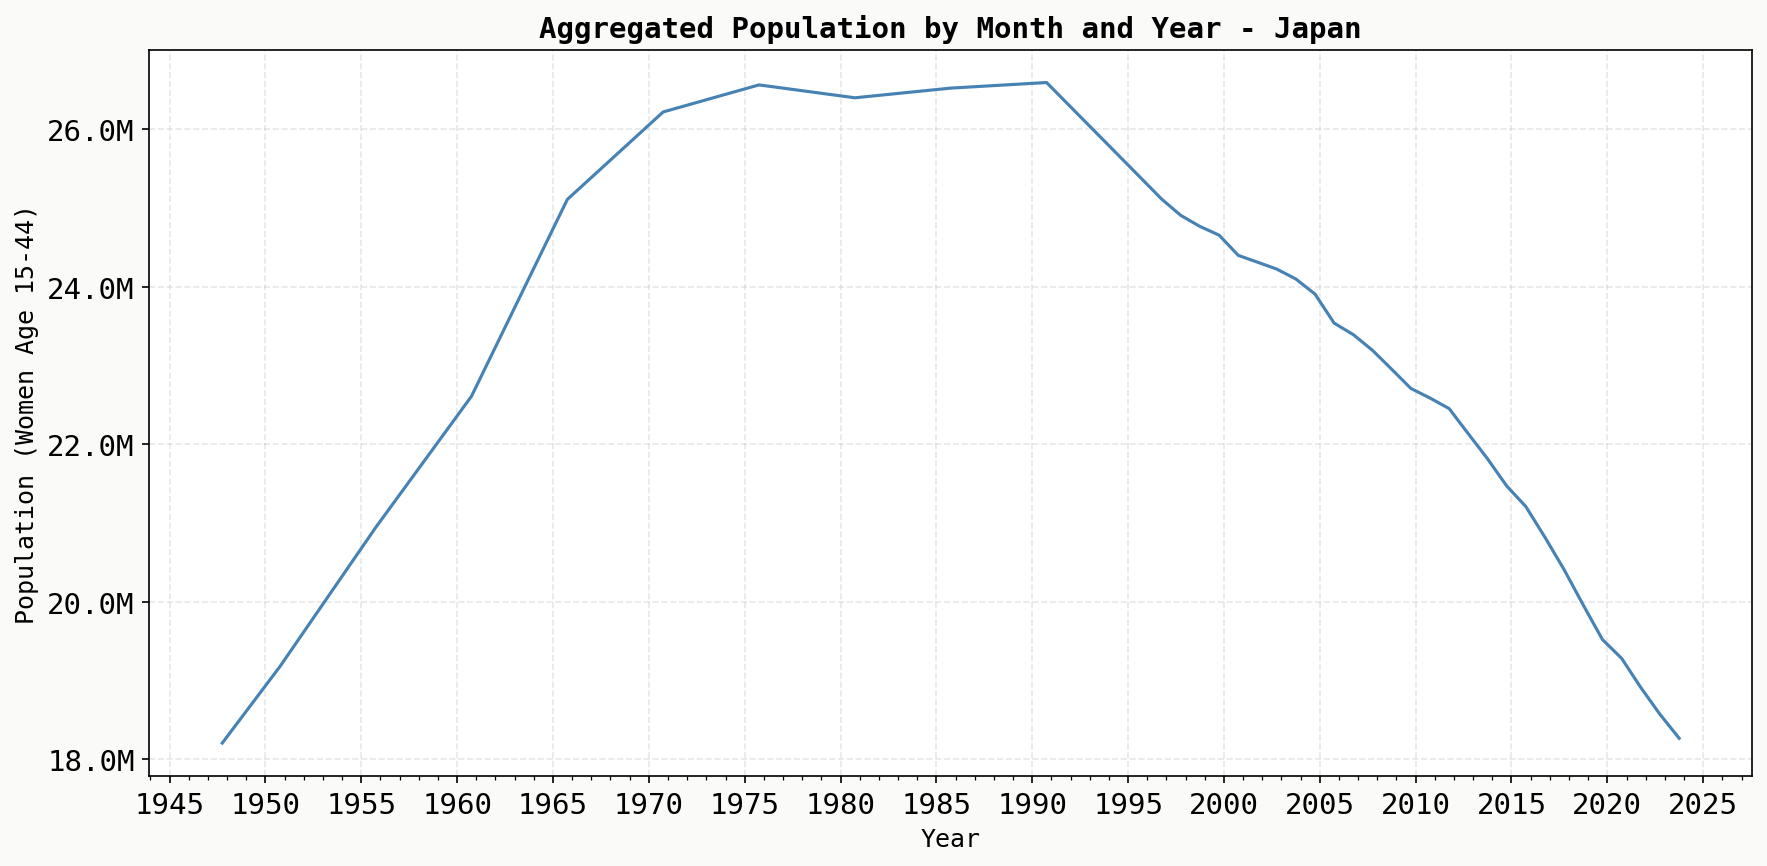

In [299]:
# Diagnostic plot: Aggregated population by month and year
# Aggregate population data by year and month
pop_agg = pop.groupby(['Year', 'Month'])['Population'].sum().reset_index()

# Create datetime index for proper time series plotting
pop_agg['date'] = pd.to_datetime(pop_agg[['Year', 'Month']].assign(Day=1))
pop_agg = pop_agg.sort_values('date').reset_index(drop=True)

# Create line plot
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
ax.plot(pop_agg['date'], pop_agg['Population'], linewidth=1.5, color='steelblue')

# Format x-axis as dates
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.YearLocator())

# Add labels and title
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population (Women Age 15-44)', fontsize=12)
ax.set_title(f'Aggregated Population by Month and Year - {country_name}', fontsize=14, weight='bold')

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Format y-axis to show values in millions or thousands
if pop_agg['Population'].max() > 1e6:
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
else:
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: f'{x/1e3:.0f}K'))

plt.tight_layout()
plt.show()


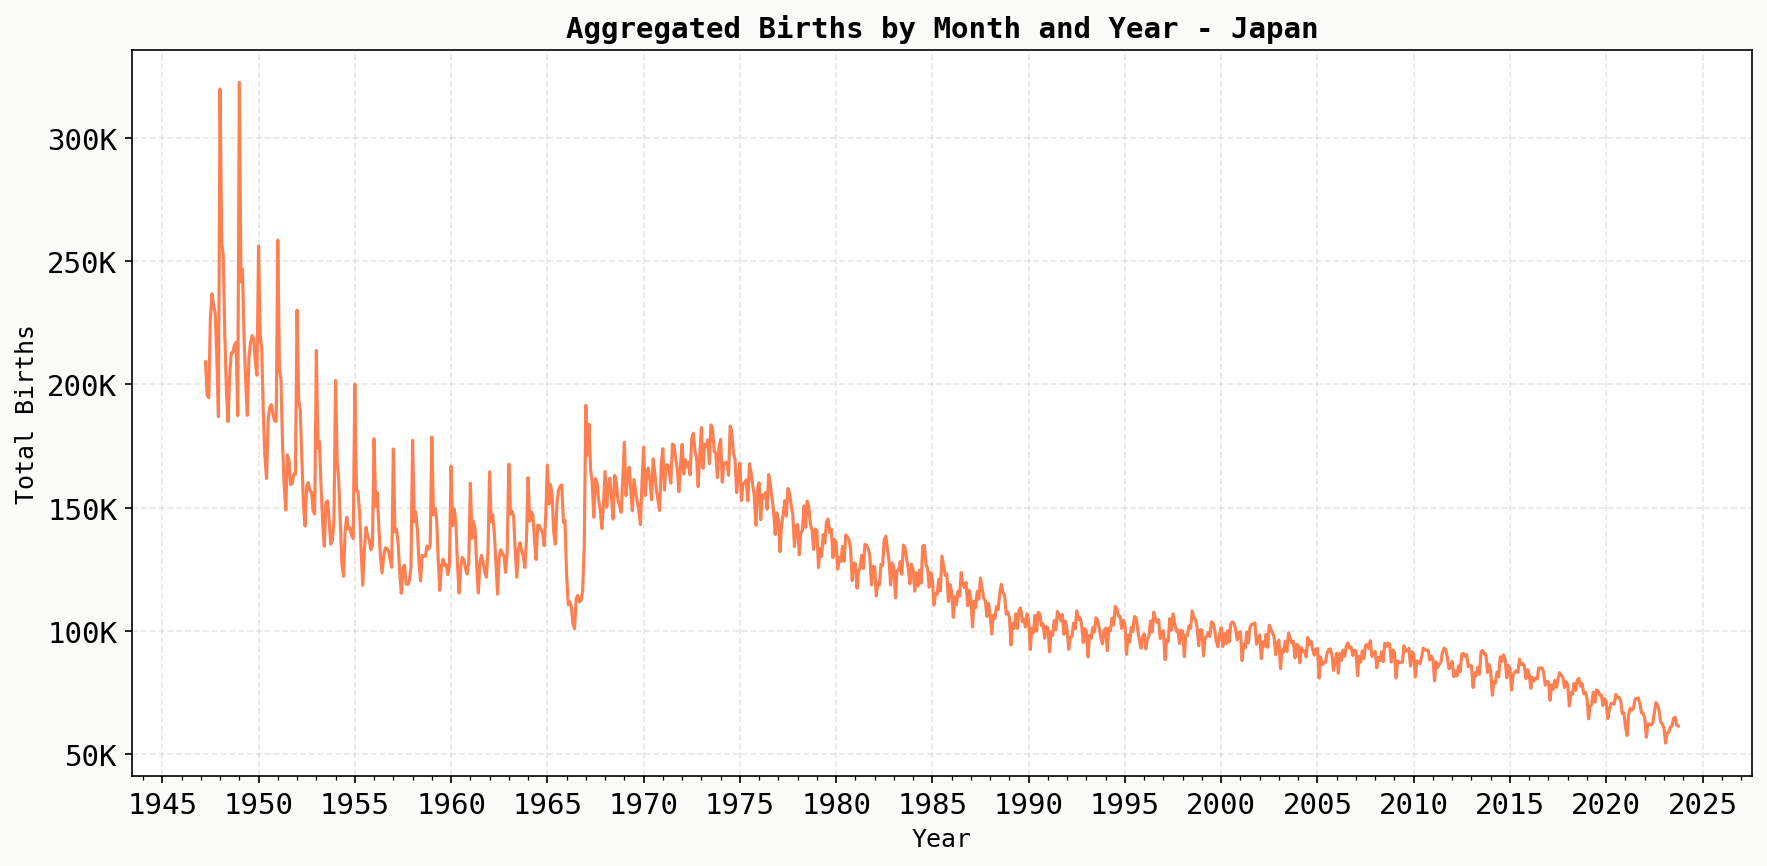

In [300]:
# Diagnostic plot: Aggregated births by month and year
# Aggregate births data by year and month (in case there are multiple entries)
births_agg = births.groupby(['Year', 'Month'])['Births'].sum().reset_index()

# Create datetime index for proper time series plotting
births_agg['date'] = pd.to_datetime(births_agg[['Year', 'Month']].assign(Day=1))
births_agg = births_agg.sort_values('date').reset_index(drop=True)

# Create line plot
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
ax.plot(births_agg['date'], births_agg['Births'], linewidth=1.5, color='coral')

# Format x-axis as dates
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.YearLocator())

# Add labels and title
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Births', fontsize=12)
ax.set_title(f'Aggregated Births by Month and Year - {country_name}', fontsize=14, weight='bold')

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Format y-axis to show values in thousands or millions
if births_agg['Births'].max() > 1e6:
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: f'{x/1e6:.2f}M'))
else:
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: f'{x/1e3:.0f}K'))

plt.tight_layout()
plt.show()


In [301]:
pop[pop['Year'] == 2000]

,Year,Month,Age,Population
450,2000,10,15,699393.0
451,2000,10,16,722945.0
452,2000,10,17,731068.0
453,2000,10,18,730811.0
454,2000,10,19,738031.5
455,2000,10,20,766010.0
456,2000,10,21,777520.0
457,2000,10,22,806697.0
458,2000,10,23,825239.5
459,2000,10,24,867340.5


In [302]:
births[births['Year'] == 1966]

,Year,Month,Births,Population,days_in_month,births_per_day,daily_fertility_rate
804,1966,1,122783.0,25161933.5,31,3960.741935,15.741008
805,1966,2,110695.0,25180446.0,28,3953.392857,15.700250
806,1966,3,111909.0,25198958.5,31,3609.967742,14.325861
807,1966,4,109581.0,25217471.0,30,3652.700000,14.484799
808,1966,5,102788.0,25235983.5,31,3315.741935,13.138945
809,1966,6,100914.0,25254496.0,30,3363.800000,13.319609
810,1966,7,113106.0,25273008.5,31,3648.580645,14.436669
811,1966,8,114427.0,25291521.0,31,3691.193548,14.594589
812,1966,9,111795.0,25310033.5,30,3726.500000,14.723410
813,1966,10,112387.0,25328546.0,31,3625.387097,14.313443


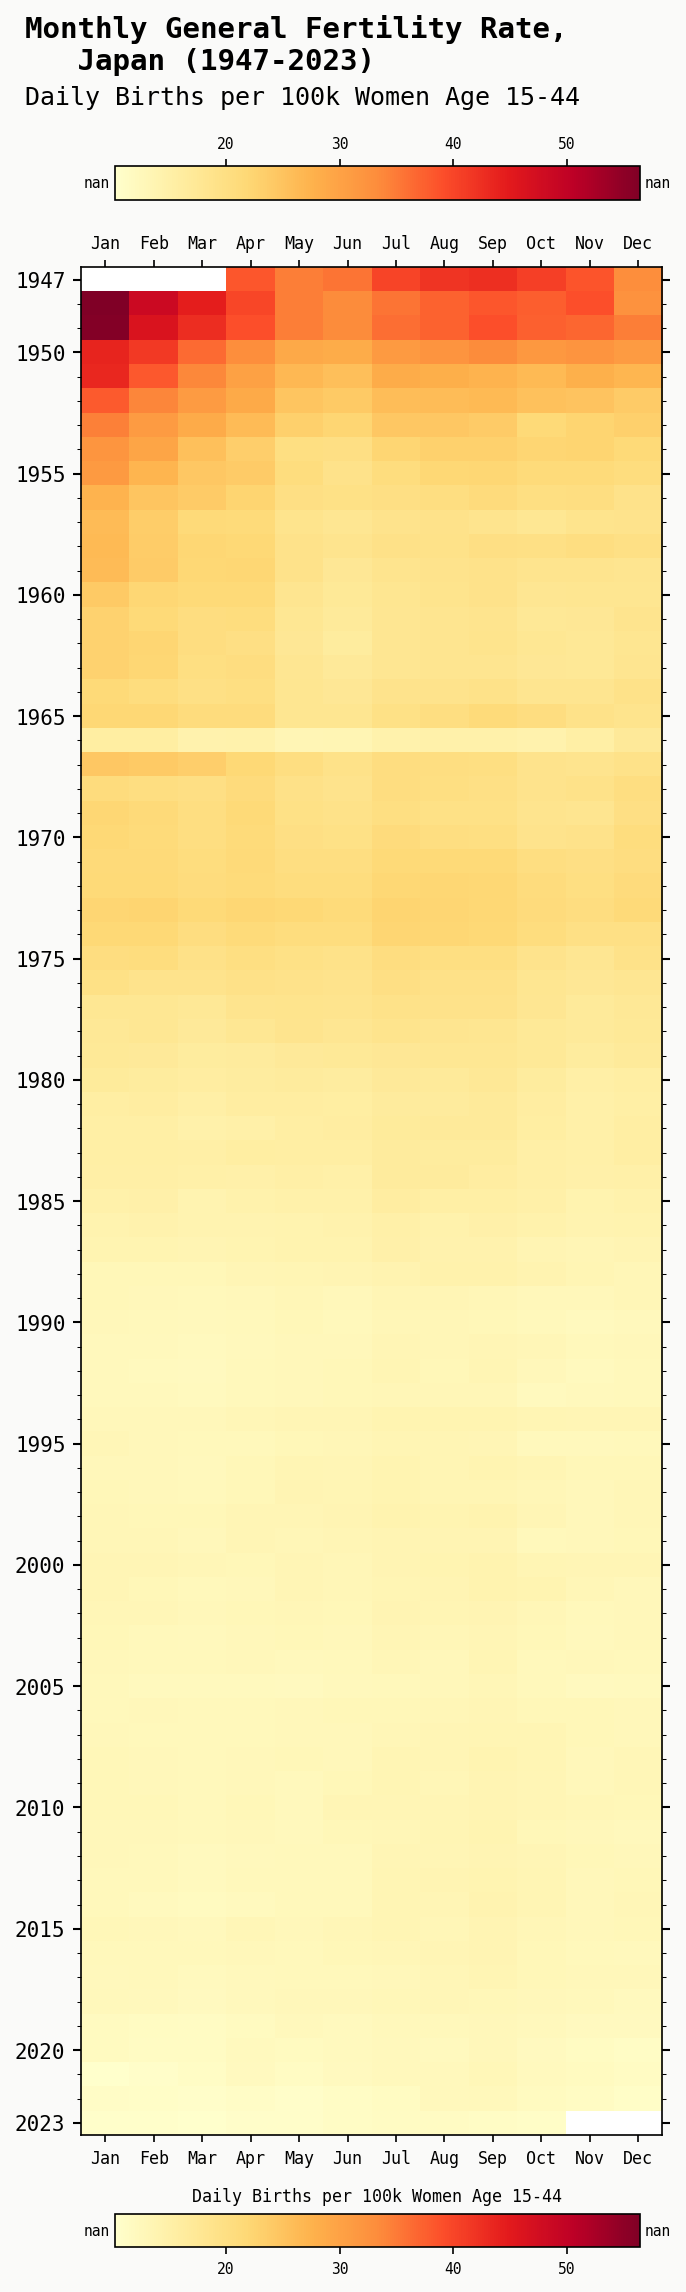

In [303]:
# prepare data for heatmap: pivot to have years as rows, months as columns (vertical orientation)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# pivot the data: years as rows, months as columns
heatmap_data = births.pivot_table(
    index='Year', 
    columns='Month', 
    values='daily_fertility_rate',
    aggfunc='first'
)

# reorder months to match 1-12 order (Jan=1, Dec=12)
heatmap_data = heatmap_data.reindex(columns=range(1, 13))

# ensure years are sorted
heatmap_data = heatmap_data.sort_index(axis=0)

# determine tick spacing - only use 2, 5, or 10 years
years = heatmap_data.index.values
num_years = len(years)
# choose spacing to get approximately 10-30 tick labels
if num_years <= 40:
    tick_spacing = 2  # more frequent for shorter ranges
elif num_years <= 100:
    tick_spacing = 5  # medium spacing for medium ranges
else:
    tick_spacing = 10  # less frequent for very long ranges

# find first "even" year according to spacing (e.g., for spacing 5, first year ending in 0 or 5)
first_year = years[0]
last_year = years[-1]

# find the first year that aligns with the spacing pattern
if tick_spacing == 2:
    # even years (divisible by 2)
    first_even_year = first_year if first_year % 2 == 0 else first_year + 1
elif tick_spacing == 5:
    # years ending in 0 or 5
    remainder = first_year % 10
    if remainder == 0 or remainder == 5:
        first_even_year = first_year
    elif remainder < 5:
        first_even_year = first_year - remainder + 5
    else:  # remainder is 6-9
        first_even_year = first_year - remainder + 10
elif tick_spacing == 10:
    # years ending in 0 (divisible by 10)
    remainder = first_year % 10
    if remainder == 0:
        first_even_year = first_year
    else:
        first_even_year = ((first_year // 10) + 1) * 10

# create ticks starting from the first even year
tick_years = np.arange(first_even_year, last_year + 1, tick_spacing)

# ensure first and last years are included if not already covered
if first_year not in tick_years:
    tick_years = np.append(first_year, tick_years)
if last_year not in tick_years:
    tick_years = np.append(tick_years, last_year)

# sort and filter to only include years that exist in data
tick_years = np.sort(tick_years)
tick_years = tick_years[np.isin(tick_years, years)]
tick_positions = [np.where(years == year)[0][0] for year in tick_years]

# create figure and axis (taller than wide for vertical orientation)
# Add top padding for title and horizontal colorbar
fig, ax = plt.subplots(figsize=(5, 15), dpi=150)
fig.subplots_adjust(top=0.88, bottom=0.05)  # make room for title and colorbar at top

# create heatmap (transpose the data so years are rows, months are columns)
im = ax.imshow(heatmap_data.values, interpolation='nearest', cmap='YlOrRd', aspect='auto')

# styling
ax.grid(False)
for spine in ax.spines.values():
    spine.set_color('black')

# set y-axis ticks and labels (years)
ax.set_yticks(tick_positions)
ax.set_yticklabels(tick_years, fontsize=10, color='black')
ax.yaxis.tick_left()  # ensure ticks are on the left

# # set alignment for first and last labels
# tick_labels = ax.get_yticklabels()
# if len(tick_labels) > 0:
#     # first label: top-aligned
#     tick_labels[0].set_verticalalignment('top')
#     # last label: bottom-aligned
#     if len(tick_labels) > 1:
#         tick_labels[-1].set_verticalalignment('bottom')

# set y-axis minor ticks (every year, or every 2 years for spacing 10)
if tick_spacing == 10:
    minor_spacing = 2  # every 2 years for 10-year spacing
else:
    minor_spacing = 1  # every year for 2 and 5-year spacing

# create minor tick positions for all years
minor_tick_positions = np.arange(0, len(years), minor_spacing)
ax.set_yticks(minor_tick_positions, minor=True)

# configure tick parameters
ax.tick_params(axis='y', which='major', length=4, width=1, left=True, right=True)  # major ticks visible
ax.tick_params(axis='y', which='minor', length=2, width=0.5, left=True, right=True)  # minor ticks smaller

# set x-axis ticks and labels (month names)
# For imshow, the pixel centers are at integer positions (0, 1, 2, ..., 11) for 12 columns
ax.set_xticks(np.arange(12))
ax.set_xticklabels(month_names, fontsize=8, color='black', ha='center')
ax.tick_params(axis='x', labeltop=True, labelbottom=True, top=True, bottom=True)
# ax.xaxis.tick_top()  # move ticks and labels to top
# ax.xaxis.set_label_position('top')

# add horizontal colorbar above the heatmap
# [left, bottom, width, height] - positioned above the heatmap
# Get min and max values for labels
vmin = heatmap_data.values.min()
vmax = heatmap_data.values.max()

# function to plot colorbar on top and bottom
def plot_cbar(cax, top=True, title=None):
    cb = plt.colorbar(im, cax=cax, orientation='horizontal')
    cb.outline.set_edgecolor('black')
    cax.tick_params(labelsize=7)
    if top:
        # Move tick labels to top
        cax.xaxis.set_ticks_position('top')
        cax.xaxis.set_label_position('top')
        # Set tick labels on top
        cax.xaxis.tick_top()
    else:
        cax.xaxis.set_ticks_position('bottom')
        cax.xaxis.set_label_position('bottom')
        # Set tick labels on bottom
        cax.xaxis.tick_bottom()

    # Add min and max value labels at the ends
    cax.text(-0.01, 0.5, f'{vmin:.1f}', 
            transform=cax.transAxes, ha='right', va='center',
            fontsize=7, color='black')
    cax.text(1.01, 0.5, f'{vmax:.1f}', 
            transform=cax.transAxes, ha='left', va='center',
            fontsize=7, color='black')
    if title:
        cax.set_title(title, fontsize=8, color='black')


cax_top = fig.add_axes([0.17, 0.91, 0.7, 0.015])  # horizontal colorbar above heatmap
cax_bottom = fig.add_axes([0.17, 0.00, 0.7, 0.015])  # horizontal colorbar below heatmap
plot_cbar(cax_top)
plot_cbar(cax_bottom, top=False, title='Daily Births per 100k Women Age 15-44')
# annotations - position title above the plot
text = fig.text(0.05, 0.95,
         'Daily Births per 100k Women Age 15-44',
         fontsize=12, color='black', ha='left', va='bottom', transform=fig.transFigure)
ex = text.get_window_extent()
x, y = text.get_position()
t = transforms.offset_copy(text._transform, y=ex.height + 10, units='dots')

fig.text(x, y, 
         f'Monthly General Fertility Rate,\n   {country_name} ({first_year}-{last_year})', 
         fontsize=14, color='black', weight='bold', ha='left', va='bottom', transform=t)




plt.show()
